In [ ]:
%cd /content/drive/My Drive/BIO/xrays

/content/drive/My Drive/BIO/xrays


In [ ]:
!nvidia-smi

Fri Nov 13 13:52:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    31W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
device = tf.test.gpu_device_name()
device

'/device:GPU:0'

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization, MaxPooling2D, Dropout
from keras.optimizers import SGD, Adam
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

import matplotlib.pyplot as plt

In [ ]:
!ls

imgs		    test_mass		 train_emphysema  valid_consolidation
models		    test_nodule		 train_mass	  valid_edema
test_all	    test_pneumonia	 train_nodule	  valid_emphysema
test_consolidation  train_all		 train_pneumonia  valid_mass
test_edema	    train_consolidation  Untitled0.ipynb  valid_nodule
test_emphysema	    train_edema		 valid_all	  valid_pneumonia


In [ ]:
dis = "nodule"

In [ ]:
trdata = ImageDataGenerator()
#traindata = trdata.flow_from_directory(directory="PA_AP_train_v4",target_size=(275, 220))
traindata = trdata.flow_from_directory(
    directory="train_{}".format(dis),
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)

tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(
    directory="test_{}".format(dis),
    target_size=(625, 500),
    batch_size=32,
    class_mode='categorical'
)

vddata = ImageDataGenerator()
validdata = vddata.flow_from_directory(
    directory="valid_{}".format(dis),
    target_size=(625, 500),
    batch_size=32,
     
)

Found 2148 images belonging to 2 classes.
Found 429 images belonging to 2 classes.
Found 288 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(625, 500, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.3))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((3, 3)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 625, 500, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 625, 500, 32)      128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 625, 500, 32)      9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 625, 500, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 208, 166, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 208, 166, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 208, 166, 64)      1

In [ ]:
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
!nvidia-smi

Fri Nov 13 13:53:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   71C    P0    31W /  70W |    359MiB / 15079MiB |      1%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
dis

'nodule'

In [ ]:
hist = model.fit(
    traindata, 
    validation_data=testdata,
    epochs=4
)

Epoch 1/4
68/68 [==============================] - 1027s 15s/step - loss: 0.8258 - accuracy: 0.5624 - val_loss: 0.6135 - val_accuracy: 0.7343
Epoch 2/4
68/68 [==============================] - 50s 730ms/step - loss: 0.6178 - accuracy: 0.6732 - val_loss: 0.5881 - val_accuracy: 0.7343
Epoch 3/4
68/68 [==============================] - 49s 724ms/step - loss: 0.5804 - accuracy: 0.7211 - val_loss: 0.5983 - val_accuracy: 0.7343
Epoch 4/4
68/68 [==============================] - 49s 727ms/step - loss: 0.5657 - accuracy: 0.7253 - val_loss: 0.5857 - val_accuracy: 0.7366


In [ ]:
acc = model.evaluate_generator(validdata)
print("Loss: ", acc[0], "Accuracy: ", acc[1])
print('> %.3f' % (acc[1] * 100.0))

Instructions for updating:
Please use Model.evaluate, which supports generators.
Loss:  0.5867898464202881 Accuracy:  0.7326388955116272
> 73.264


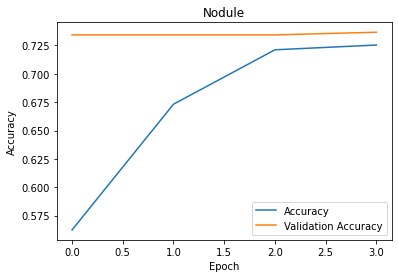

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.title("{}".format(dis).capitalize())
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.savefig("imgs/{}_acc.png".format(dis))
plt.show()

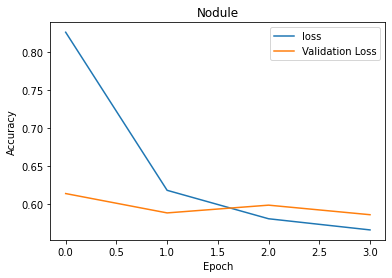

In [ ]:
plt.plot(hist.history["loss"])
plt.plot(hist.history['val_loss'])
plt.title("{}".format(dis).capitalize())
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.savefig("imgs/{}_loss.png".format(dis))
plt.show()

In [ ]:
model.save("models/{}_625_500.h5".format(dis))

In [ ]:
!nvidia-smi

Fri Nov 13 12:02:32 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    32W /  70W |  14575MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------